In [3]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1]+true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

In [7]:
print(features[0],labels[0])

tensor([-1.0975,  0.4868], dtype=torch.float64) tensor(0.3422, dtype=torch.float64)


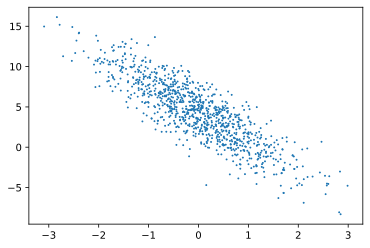

In [15]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [18]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [19]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[-0.3031, -0.2040],
        [-0.6010,  1.2068],
        [ 0.5550,  0.4897],
        [-1.3174,  0.7597],
        [ 1.9953, -0.1784],
        [ 0.5846, -1.1536],
        [ 0.0304, -0.7174],
        [ 2.3784,  1.1684],
        [-0.4833, -0.1726],
        [-0.0739, -0.5946]], dtype=torch.float64) tensor([ 4.2850, -1.1113,  3.6480, -1.0065,  8.8089,  9.2954,  6.7030,  4.9723,
         3.8053,  6.0641], dtype=torch.float64)


In [20]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [21]:
def linreg(X,w,b):
    return torch.mm(X,w)+b


In [22]:
def squared_loss(y_hat,y):
    return (y_hat - y.view(y_hat.size())**2/2)

In [23]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

In [48]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y).sum(),dtype=torch.float32
        l.backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        w.grad.data.zero_()
    train_1 = loss(net(features,w,b),labels)
    print('epoch %d,loss %f' % (epoch+1,train_1.mean().item()))

SyntaxError: can't assign to function call (<ipython-input-48-b7750beeff38>, line 7)